In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram
import pandas as pd

In [3]:
# === 1. Cargar datos del archivo .plt ===
file_path = 'C:\\Users\\Krlo\\OneDrive - Universidad Politécnica de Madrid\\Escritorio\\TFG\\Codigo\\Datos\\038\\Trajectory\\20090215034705.plt'
df = pd.read_csv(file_path, skiprows=6, header=None)
df.columns = ['lat', 'lon', 'unused1', 'alt', 'time_float', 'date', 'time']
points = df[['lat', 'lon', 'alt']].values


In [4]:
# === 2. Visualizar nube de puntos ===
from gtda.plotting import plot_point_cloud
plot_point_cloud(points)

In [5]:

# === 3. Calcular diagrama de persistencia ===
vr = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])
diagrams = vr.fit_transform([points])

# Graficar el diagrama
plot_diagram(diagrams[0])

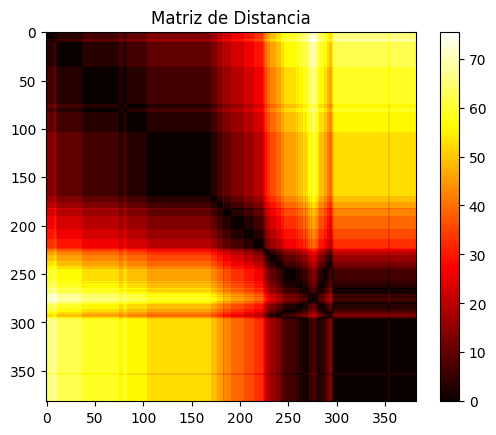

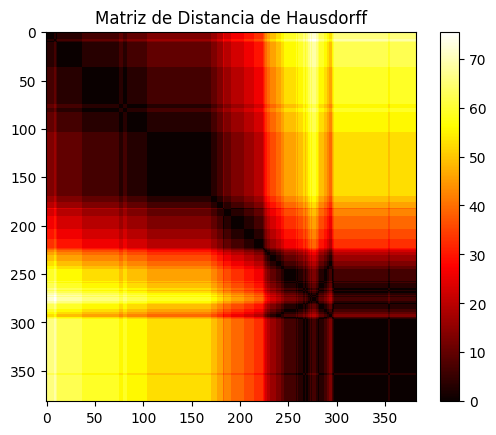

In [ ]:
from gtda.diagrams import PersistenceEntropy
from gtda.plotting import plot_diagram
from gtda.mapper import plot_static_mapper_graph
from gtda.mapper import make_mapper_pipeline
from gtda.mapper import CubicalCover
from gtda.mapper import Projection
from sklearn.cluster import DBSCAN
pe = PersistenceEntropy(normalize=True)
features = pe.fit_transform(diagrams)
plot_point_cloud(features)
plt.show()


pipe = make_mapper_pipeline(
    filter_func=Projection(columns=[0, 1]),
    cover=CubicalCover(n_intervals=10, overlap_frac=0.3),
    clusterer=DBSCAN(),
    n_jobs=6
)

graph = pipe.fit_transform(features)

# === 4. Calcular la matriz de distancia ===
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances


# Calcular la matriz de distancia
distance_matrix = pairwise_distances(points, metric='euclidean')
# Visualizar la matriz de distancia
plt.imshow(distance_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Distancia')
plt.show()
# === 5. Calcular la matriz de distancia de Hausdorff ===
from scipy.spatial.distance import directed_hausdorff
def hausdorff_distance(a, b):
    return max(directed_hausdorff(a, b)[0], directed_hausdorff(b, a)[0])
# Calcular la distancia de Hausdorff entre todos los pares de conjuntos de puntos
hausdorff_matrix = np.zeros((len(points), len(points)))
for i in range(len(points)):
    for j in range(len(points)):
        hausdorff_matrix[i, j] = hausdorff_distance(points[i:i+1], points[j:j+1])
# === 6. Visualizar la matriz de distancia de Hausdorff ===
plt.imshow(hausdorff_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Distancia de Hausdorff')
plt.show()


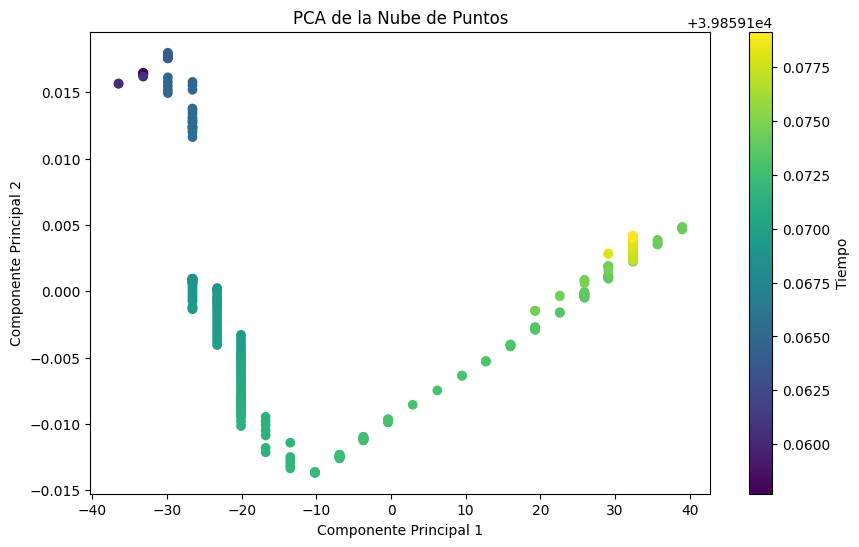

In [ ]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(points)

# Crear un DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['time'] = df['time_float']  # Asegúrate de que df['time_float'] esté alineado

# Graficar con matplotlib directamente
plt.figure(figsize=(10, 6))
sc = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['time'], cmap='viridis')
plt.colorbar(sc, label='Tiempo')
plt.title('PCA de la Nube de Puntos')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()
